In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
%config Inline.figure_format = 'retina'

# Data Structure Cheat Sheet

Two common datatypes are $\textbf{strings}$, which is text indicated by quotes: "this is a string%$!"  

or $\textbf{floats}$, which are numbers with decimal points: 1.231234

The way we manipulate these datatypes are through what are called $\textbf{data structures}$. We manipulate 
datastructures to act on data, or to visualize that data (e.g. plotting).

One of the most basic data structures in Python is a python list. A python list can store data of any
type (string or float). For most analysis we will be using what are called $\textbf{'numpy arrays'}$ (numpy = numerical python) and $\textbf{'pandas dataframes'}$ (pan_das = 'panel data'). These are another two types of data structure.

Numpy arrays can be manipulated by common matrix operations, making them convenient to use. Elements in an array are accessed using 'indexes', which are numerical values associated with positions within the array. These indices follow 'number lines' called 'axes'. E.g:

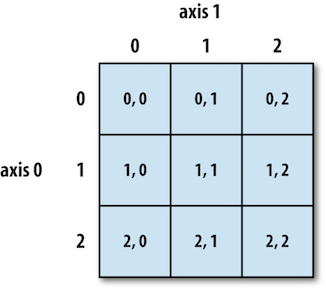

A dataframe is essentially a more complex version of a numpy array (which can be acted upon by most numpy manipulations, or 'functions') that has named columns and rows, like an excel spreadsheet. It is a convenient data structure to access information that is linked to specific markers that one needs to keep track of. This could be something like a subject-to-data pair.

Listed below are some common manipulations or 'gotchas' that are relevant for these two data structures. The first section covers some basic things utilizing Python lists.

### Python List Stuff

In [2]:
#General imbedded list stuff and indexing

#Basic list
alist = [1,2,3,4,5, 'yo', 'bro'] #can store strings, not just numbers
print(alist)

#accessing a list by an items 'location' or index. Python starts at 0.
print('no. 2 index is third item: ', alist[2]) 

[1, 2, 3, 4, 5, 'yo', 'bro']
no. 2 index is third item:  3


### Slicing and Accessing Elements

Slicing is a way we can pull out specific data points from index to index, using the ':' operator. Some
examples are listed below with their outputs.

In [3]:
#Constructing a 2D, 'imbeded list' (list within a list)
alist2 = [[1,2],[3,4],[5,6], [7,8],[9,10]]

#just like a matrix, you go 'm x n' --> m = row, n = column 
print('Element selected: ', alist2[0][:]) #select a 'row', then a 'column'

#slicing is beginning inclusive
print('slicing is NOT end inclusive: ', alist2[0:2])
print('Using Negative Indices: ', alist2[:-1])
print('Changing the Slice step: ' ,alist2[::2]) #start:end:step; no args will give you the whole thing!


## Important to understand that slicing functions like an operator. If no numbers are specified, it'll grab the
#whole thing!

#Slices out all the rows, then selects the second element of that list
print('1: ', alist2[:][1])

#To get a specific element from each row, and return as a list (i.e. a column!)
alist3 = [value[0] for value in alist2] #using list comprehension
print('2: ', alist3) 

print('3: ', alist2[:3][:2])

Element selected:  [1, 2]
slicing is NOT end inclusive:  [[1, 2], [3, 4]]
Using Negative Indices:  [[1, 2], [3, 4], [5, 6], [7, 8]]
Changing the Slice step:  [[1, 2], [5, 6], [9, 10]]
1:  [3, 4]
2:  [1, 3, 5, 7, 9]
3:  [[1, 2], [3, 4]]


In [4]:
#To append a vector to a list (or a numpy array) you have to make it the same dimensionality object!
list1 = [[1,2],[2,3]]
element = [4,5]

#you have to make sure you're adding a 'vector' to a list of vectors (not just the values stored in element)

list2 = list1 + [element]
print(list2)
print('-----VS-----')
list3 = list1 + element
print(list3)

[[1, 2], [2, 3], [4, 5]]
-----VS-----
[[1, 2], [2, 3], 4, 5]


### Making Copies of an object

You can make a copy of the data in a object (to put it in another one, to seperately manipulate). However, one 
needs to be careful about what type of copy you are making. 

In python there are two types: $\textbf{shallow}$ and $\textbf{deep}$ 

A shallow copy will merely just make a new name that references everything the old object did. If you change
either of the objects, you will 

A deep copy will create an entirely $\textit{new}$ object with the same values. Do this, it'll make 
your life simpler.

In [5]:
#list2 = list1 will just copy over the same object reference to a new name. Both names still call the same
#object
list1 = ['potato', ['frenchfry', 'baked']]
list2 = list1
print('id list1', id(list1))
print('id list2', id(list2))
print('----'*5)

#'copy' will create a NEW object, but copies everything 'shallowly' (just first level *references*)
#So, although copy does produce a 'new object', anything imbedded is just a reference to that other object!
list3 = list1.copy()
print('id list1', id(list1))
print('id list3', id(list3))
print('----'*5)

list1[0] = 'unhealthy'
print('list1', list1)
print('list3', list3)
print('id list1', id(list1))
print('id list3', id(list3))
print('----'*5)

id list1 140568983095808
id list2 140568983095808
--------------------
id list1 140568983095808
id list3 140568984010368
--------------------
list1 ['unhealthy', ['frenchfry', 'baked']]
list3 ['potato', ['frenchfry', 'baked']]
id list1 140568983095808
id list3 140568984010368
--------------------


This can lead to problems....where we think we have two seperate objects, but they still
reference the same thing!

In [6]:
#In this case we change the object that both lists point to, and so both lists change!
list1[1][0] = 'chips'
print('list1', list1)
print('list3', list3)
print('WHOA both lists changed')

##--UPSHOT--> Use DEEP copies when trying to copy values in arrays!

list1 ['unhealthy', ['chips', 'baked']]
list3 ['potato', ['chips', 'baked']]
WHOA both lists changed


# Numpy Reference 

Quickstart guide:
https://numpy.org/doc/stable/user/quickstart.html

Numpy arrays are SUPER useful. They allow for matrix and element wise operations, similar to Matlab! Below are some nice references for common uses.

This way, we can forgo using 'for' loops to operate on our array entries.

Some terminology about the data structure:

Numpy Axes = 'dimensionality'


#### About numpy array vectors and their shape:

Numpy arrays, when 1D, are 'column vectors', despite being 'printing' horizontal. While in 2D, the first index gets you rows (axis = 1),
and the second index (axis = 0) will get you the column...as is seen visually.

However, in a 1D array you only have one dimension! So it's just assumed to be 'vector', which will be treated like a vector.

Note that: [[1,2,3,4,5]] $\neq$ [1,2,3,4,5]

The first is a (1,5) matrix. The second is a (5,1) vector!

### Relevant Numpy class 'ndarray' attributes and creation

In [7]:
# Array creation

# a = np.array(1, 2, 3, 4)  # WRONG. Array creation only takes one argument.

x = np.array([[1,2,3], [4,5,6]])

#attributes
print(x.shape) #gives mxn (rows by columns)
print(x.size) #gives the total number of elements
print(len(x))

#Element wise
bla = np.array([4] * 3)
print('bla: ', bla)

#fill with zeros
bla2 = np.zeros((4,3))
print('bla2: ')
print(bla2)

#np.zeros_like??


#create a sequence of numbers
bla3 = np.arange(0, 10, 2) #start, stop (not included), step 
print('bla3: ')
print(bla3)

#Linspace is better when wanting to use floats
bla4 = np.linspace(0,2,9) #start, stop, number of points
print('bla4: ')
print(bla4)


(2, 3)
6
2
bla:  [4 4 4]
bla2: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
bla3: 
[0 2 4 6 8]
bla4: 
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


#### When building Numpy arrays, we don't append to them. 
It is better to create an array as a holder and then add to that array:

In [8]:
#Making an empty array and changing the value
z = np.zeros((4,3)) 
z_alt = np.ones((4,3)) #we can also fill an array with ones

z[0][2] = 1
print(z)
print(z_alt)
print('---------------')
print(z[:][:2])
print('VS. element selection: ')
print(z[0][2])

[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
---------------
[[0. 0. 1.]
 [0. 0. 0.]]
VS. element selection: 
1.0


In [9]:
#Keep in mind, the dimensionality of the zeros array you create must match the dimensionality of 
#what you're trying to place in the holder. 

#You CANT put a 1D numpy array inside another 1D numpy array! Instead, create a 2D array:
 
bla = np.zeros((3,2))
print(bla)
print('----'*10)
bla[0] = np.array([1,2])
print(bla)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
----------------------------------------
[[1. 2.]
 [0. 0.]
 [0. 0.]]


### Reshaping Arrays

In [10]:
a= np.array([[1,2,3], [4,5,6]])

#'Squash' the dimensionality and return a 1D array of all entries. Does it row by row. 
b = a.flatten()
print(b)
print('---'*5)

#We can get back by using '.reshape()' to take a 1D array and 'mold it'
b = b.reshape(2,3)
print(b)
print('---'*5)

b = a.T #takes the matrix transponse, switching columns and rows
print(b)
print('---'*5)



[1 2 3 4 5 6]
---------------
[[1 2 3]
 [4 5 6]]
---------------
[[1 4]
 [2 5]
 [3 6]]
---------------


### Slicing

In general, similar to python lists, beyond what is added here


In [11]:
a= np.array([[1,2,3], [4,5,6], [7,8,9]])

#multidimensional arrays have indexing for each axis, seperated by a comma

#like matlab. return all rows 'nth' element as a new array
print(a[:, 1]) 
print('----'*5)

##--Numpy Special Stuff--##

#You can index an array using another array of indices
indices_rows = np.array([0,2])
indices_columns = np.array([0,0])

print(a[indices_rows, indices_columns])


#We can use booleans to select data as well!
index_boolean = np.array([True, False, True])
print(a[index_boolean])
print('----'*5)

#We can use this to select data that meets a certain condition
a = np.arange(12).reshape(3, 4)
b = a > 4
print(b)
print('----'*5)
print(a[b])


[2 5 8]
--------------------
[1 7]
[[1 2 3]
 [7 8 9]]
--------------------
[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]
--------------------
[ 5  6  7  8  9 10 11]


In [12]:
# unique will grab all the unique values in the array, and then return a 1D ordered array (small to large)
bla = np.array ([1,3,4,6,2,4,6,7,4,2,9,10,9])
bla2 = np.unique(bla)
print(bla2)
print(type(bla2))

[ 1  2  3  4  6  7  9 10]
<class 'numpy.ndarray'>


### Iterating

Iteration occurs with respect to the first axis (row)

In [13]:
for row in a:
    print(row + 1)

[1 2 3 4]
[5 6 7 8]
[ 9 10 11 12]


## Operations


### Arithmetic 
Is element wise (e.g. each constituent element is matched to the other. If given a scalar, will
multiply all the elements

In [14]:
a = np.array([1,2,3,4])
b = np.arange(0,40, 10)
c = b-a
print('b: ', b)
print('b-c: ', c)

#UNLIKE in other matrix langues the '*' operator works element wise:

print('old a:', a)
a = a * 5  #arithmetic doesn't function 'in-place' --> it will produce output, so save to old namespace 
print('new a: ', a)

b:  [ 0 10 20 30]
b-c:  [-1  8 17 26]
old a: [1 2 3 4]
new a:  [ 5 10 15 20]


#### Basic statistics and functions (methods) acting of an array

In [15]:
a = np.array([[1,2,3],[4,5,6]])

print('sum: ', a.sum () )
print('min: ', a.min() )
print('max: ', a.max())

#or you can apply a row (axis = 1) or column (axis = 0)
print('sum along the rows: ', a.sum(axis = 1)) #returns array of row sums

#as you expect

print('----' *10)
print(np.sqrt(4))
print(np.cos(np.pi))
print()


sum:  21
min:  1
max:  6
sum along the rows:  [ 6 15]
----------------------------------------
2.0
-1.0



### Linear algebra commands

Reference:
https://numpy.org/doc/stable/reference/routines.linalg.html

#### Multiplication



In [16]:
a = np.array([[1, 0], #This is a 3x2 vector!
              [0, 1],
              [1, 1]])
b = np.array([1, 2]) #This is actually a 2x1 vector!
c = np.array([[1,2]]) #This is a 1x2 matrix

print('a:',a.shape)
print('b:', b.shape)
print('c:', np.shape(c))

print(np.matmul(a,b)) #or, you can use the '@' operator

#Throws an error! 
# print(np.matmul(a,c))

#To prevent the error
print(np.matmul( a,c.flatten() ))


a: (3, 2)
b: (2,)
c: (1, 2)
[1 2 3]
[1 2 3]


#### Assorted commands

In [17]:
v = np.array([2,2,2]) 

a = np.array([[1,2,3], [4,5,6]]) #will accept a 1D vector

print('Dot product:')
print(np.dot(a,v))

print('Norm: ')
print(np.linalg.norm(a))

print('SVD: ')
print(np.linalg.svd(a)) #output of U, S (1D array of the singular values), V.T

# print('Eigen values and vectors: ')
# print(np.linalg.eig())


Dot product:
[12 30]
Norm: 
9.539392014169456
SVD: 
(array([[-0.3863177 ,  0.92236578],
       [-0.92236578, -0.3863177 ]]), array([9.508032  , 0.77286964]), array([[-0.42866713, -0.56630692, -0.7039467 ],
       [-0.80596391, -0.11238241,  0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]]))


### Deep copies in Numpy arrays 
Make deep copies!

In [18]:
#Deep copies; if we want to copy an object, and we don't want to merely just copy a reference to the old object in
#memory, we have to make what is called a 'deep copy'. This will copy all the old values of the old object,
#into a new object!

x = np.array([1,2,3,4])
y = x
y[1] = 10
print('y', y)
print('x', x)
print('----'*5)
print('WHOA! Look, x changed as well! And the memory location is the same:')

print('x_id', id(x))
print('y_id', id(y))

#gotta make deep copies! use np.copy() to do this!

y [ 1 10  3  4]
x [ 1 10  3  4]
--------------------
WHOA! Look, x changed as well! And the memory location is the same:
x_id 140568984174384
y_id 140568984174384


# Dataframes Reference

Pandas has two major datatypes: (1) Series & (2) Dataframe.

A 'Series' is a 1D array, with indices that can be different datatypes, but typically numeric, similar to a numpy array or a python list. 

A 'Dataframe' is a 2D array, with indices that can also be different datatypes, and the columns are 'labels' that
can be used to manipulate or access the data held within!

The PRIMARY difference b/w a dataframe and a numpy array, is that a Dataframe can use multiple data types.

$\textrm{A DATAFRAME has a unique datatype for a column, a NUMPY ARRAY has a unique type for each array}$

#### Reading in files can be from .csv or excel sheets!

In that case, use df = pd.read_csv('title of file'). This will read in the .csv file into your 
jupyter notebook, providing the file is in the same directory as your jupyter notebook file!

In [19]:
#This is a "series". Can be constructed using a np.array
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s)
print('--------')

#You can also construct a series from a dictionary, using the keys as the indices
d = {"b": 1, "a": 0, "c": 2}
s_from_d = pd.Series(d)
print('series from dictionary: ')
print(s_from_d)

a    0.863315
b    0.139051
c    2.033403
d   -0.772248
e   -2.262976
dtype: float64
--------
series from dictionary: 
b    1
a    0
c    2
dtype: int64


### Constructing Dataframes and Renaming Columns/Indices

In [72]:
#Contructing an empty Dataframe object, to then append values into later
empty = pd.DataFrame 

#You can construct a dataframe from a dictionary, and set indices
d = {'scoop': [1,2,3], 'boop': [4,5,6]}
df = pd.DataFrame(data = d, index = ["a", "b", "c"])
print(df)

#to set all the column names
df.columns = ['scoop', 'doop']
print(df)

#Rename is not 'in-place', similar to 'np.append(array, [value])' ; you'll have to save results
df = df.rename(columns = {'doop': 'GAHH'}) 
print(df)
print('----' *5)

#Changing the indices names, pass a list on indices of same length
df = df.set_axis(['1','2','3'], axis = 'index')
print('Renaming indices: ')
display(df)
print('----' *5)

#Will completely reset the index numbering; typically will take old index and make a column. Here we 'drop' it 
df = df.reset_index(drop = True)
display(df)

#return to previous
df = df.set_axis(['a','b','c'], axis = 'index')

#If you select a column using a label, a SERIES (1D) will be returned, with the same indexing as before
df2 = df['scoop']
print('shape: ', df2.shape)

print('----'*5)
print('df2: ')
print(df2)
print('^ lists the data type of the values held in the series/DF')
print('Data type of df2 object: ', type(df2) )

#you can select mutiple columns:
df3 = df[['scoop', 'GAHH']]
print(df3)




   scoop  boop
a      1     4
b      2     5
c      3     6
   scoop  doop
a      1     4
b      2     5
c      3     6
   scoop  GAHH
a      1     4
b      2     5
c      3     6
--------------------
Renaming indices: 


,scoop,GAHH
1,1,4
2,2,5
3,3,6


--------------------


,scoop,GAHH
0,1,4
1,2,5
2,3,6


shape:  (3,)
--------------------
df2: 
a    1
b    2
c    3
Name: scoop, dtype: int64
^ lists the data type of the values held in the series/DF
Data type of df2 object:  <class 'pandas.core.series.Series'>
   scoop  GAHH
a      1     4
b      2     5
c      3     6


#### You can also construct a dataframe from a numpy array, and assign columns and indices names

You have an 'empty' dataframe, that you then assign values into:


In [52]:
#Make a budget dataframe
starter = np.ones((12,4))
money_stuff = ['rent', 'grocery', 'clothing', 'fun']
expenses = pd.DataFrame(starter, columns = money_stuff, index = range(0,12))

#assign values to each of the columns
expenses['rent'] = 1300
expenses['grocery'] = 300
expenses['clothing'] = 100
expenses['fun'] = 200

expenses['monthly_total'] = expenses.sum(axis=1)
display(expenses.head(5))


#make an income array
income = np.ones((12,1)) *3000


#A column vector made in numpy will turn into a '2D' dataframe (shape = n, 1) vs (shape = (n, ))
#in order to subtract a column from a column, you need to make sure that they are the same shape:

income_pd = pd.DataFrame(income)
income_pd = income_pd[0] #Changes the 2D DF into a 1D series using '[]' operator

#They are now the same shape!
print('Shapes of the series objects: ')
print(income_pd.shape)
print(expenses['monthly_total'].shape)

#make sure to match the indexing of what you subtract, because pandas will subtract element-wise by index!
savings = expenses['monthly_total'] - income_pd
print('Head of the savings Series: ')
display(savings.head(3))

#You can also take a dataframe, and turn it back into a numpy array! :
expenses_np = expenses.to_numpy()
print(expenses_np[:5])


,rent,grocery,clothing,fun,monthly_total
0,1300,300,100,200,1900
1,1300,300,100,200,1900
2,1300,300,100,200,1900
3,1300,300,100,200,1900
4,1300,300,100,200,1900


Shapes of the series objects: 
(12,)
(12,)
Head of the savings Series: 


0   -1100.0
1   -1100.0
2   -1100.0
dtype: float64

[[1300  300  100  200 1900]
 [1300  300  100  200 1900]
 [1300  300  100  200 1900]
 [1300  300  100  200 1900]
 [1300  300  100  200 1900]]


### Adding new columns to a DF

You can add a new column to a DF, by creating a Series, and then listing a new column as that series:

In [62]:
new_col = pd.Series([7,8,9], index = ['a','c', 'b']) #Can set the indices to change the ordering
df['doop'] = new_col
display(df)

#or alternatively, use a numpy array
new_col = np.array([7,8,9])
df['doop'] = new_col
display(df)


#Note that if the index isn't the same, the value gets added as a 'NaN'

,scoop,GAHH,doop
a,1,4,7
b,2,5,9
c,3,6,8


,scoop,GAHH,doop
a,1,4,7
b,2,5,8
c,3,6,9


### Commands for Viewing Dataframes

In [70]:
pd.set_option('display.max_columns', None) #lets us view all of the columns at once 


display(df) #will show the dataframe in tabular format
display(df.head(2)) #will let us see just the top of the dataframe
display(df.tail(1)) #will let us see the 'tail' of the dataframe

#lets us view all of the columns at once  (otherwise if df is long it'll use '...')
pd.set_option('display.max_columns', None) 

#just show the index/columns; or to access them
print(df.index)
print(df.columns)
print('---'*5)
for column in df.columns:
    print(column)
print('---'*5)

#Get quick statistic summaries of your data!
df_describe = df.describe()
display(df_describe)


,scoop,GAHH
a,1,4
b,2,5
c,3,6


,scoop,GAHH
a,1,4
b,2,5


,scoop,GAHH
c,3,6


Index(['a', 'b', 'c'], dtype='object')
Index(['scoop', 'GAHH'], dtype='object')
---------------
scoop
GAHH
---------------


,scoop,GAHH
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0


### Accessing Elements of a Dataframe (using various indexing methods)

$\textbf{DON'T}$ use "object[index1][index2]" to access elements, as in numpy arrays. This is actually two operations, vs using '.loc' as below. This ('chained indexing') is slower, for one, but also produces strange results. Basically, the second $\textrm{"[ ]"}$ is not certain to return a 'copy' or a 'view'. 

Upshot, don't do this!

Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [61]:
df.iloc[0][1] #the .iloc method lets you use numerical indexing to select data values

df.loc['column', 'row']


display(df)

,scoop,GAHH,doop
a,1,4,7
b,2,5,9
c,3,6,8


#### Sorting/Ordering a Dataframe

In [78]:
#You can sort by index
ordered_df = df.sort_index(ascending = False)
print('Look at the indexes, they are sorted strings in reverse alphabetical! :')
display(ordered_df)

#You can sort numerically by column, with multiple columns (and a hierarchy of them)
ordered_desc = df_describe.sort_values(by = ['scoop', 'GAHH']) #set ignore_index = True, to keep the same indexing
display(ordered_desc)

#You can also drop DUPLICATE values!
display(ordered_desc.drop_duplicates(subset = 'scoop', keep = 'first', inplace = False, ))

Look at the indexes, they are sorted strings in reverse alphabetical! :


,scoop,GAHH
c,3,6
b,2,5
a,1,4


,scoop,GAHH
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
mean,2.0,5.0
50%,2.0,5.0
75%,2.5,5.5
count,3.0,3.0
max,3.0,6.0


,scoop,GAHH
std,1.0,1.0
25%,1.5,4.5
mean,2.0,5.0
75%,2.5,5.5
count,3.0,3.0


### Matrix manipulation and Multiplication in Pandas

** In Progress **

In [27]:
#Getting a transpose of a dataframe. This will switch the columns and the indices!:

df2 = df.T
df2

,a,b,c
scoop,1.0,2.0,3.0
GAHH,4.0,5.0,6.0
doop,7.0,8.0,NaN


### You can pass a boolean Series into a Series, to return a new Series of only the true values
--> This lets us filter out null results!

This is essentially the same thing as numpy arrays; the you are passing a list ('Series') of booleans (True/False statements)

In [28]:
#You can use booleans to generate at Series of True/False evaluations

print(df.scoop==1) # conditional evaluating where a particular value for all values for the label ('scoop')

a     True
b    False
c    False
Name: scoop, dtype: bool


In [29]:
#You can use conditionals to return a new df that just meets the boolean


#The [] operator is overloaded (multiple uses) with another function in pandas
df.iloc[1,1] = 4
df_cond = df[df.GAHH == 4] #Have to use the 'DOT' notation for the label here
print(df_cond)
print(type(df_cond))

print('old df: ')
print(df)

   scoop  GAHH  doop
a      1     4   7.0
b      2     4   8.0
<class 'pandas.core.frame.DataFrame'>
old df: 
   scoop  GAHH  doop
a      1     4   7.0
b      2     4   8.0
c      3     6   NaN


In [30]:
#You can also then immediatly select a value from that df in the same line of code:

df_cond = df[df.GAHH == 4]['scoop']['a'] 
print(df_cond)
print(type(df_cond))

1
<class 'numpy.int64'>


In [31]:
df
# df_test = df
df_test = df['doop']
df_test2 = ~np.isnan(df_test)
print(df_test2)
print('----------'*3)
print(type(df_test2))

df_test[df_test2] 

a     True
b     True
c    False
Name: doop, dtype: bool
------------------------------
<class 'pandas.core.series.Series'>


a    7.0
b    8.0
Name: doop, dtype: float64

### Applying conditionals to dataframe columns

** In Progress **

reference:
https://datatofish.com/if-condition-in-pandas-dataframe/

In [32]:
df['boop'] = [7,8,9]
display(df)

,scoop,GAHH,doop,boop
a,1,4,7.0,7
b,2,4,8.0,8
c,3,6,NaN,9


In [33]:
## Using .loc and 

## Numpy 'where'

## 'Lamda' statements

# Plotting and Vizualization

### With Dataframes

Reference:

https://pandas.pydata.org/docs/user_guide/visualization.html#visualization

<Figure size 432x288 with 0 Axes>

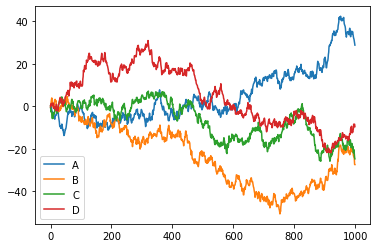

In [34]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure()

#If we plot a dataframe, we will automatically plot the values along each column, with 
df.plot() 
plt.legend(loc = 'best')